## Cancer Survival Time

#### ML Life Cycle

- Problem Statement
- Data Collection
- Data Checks
- Exploratory data analysis (EDL)
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project investigates the temporal dynamics of brain tumor growth and recurrence to provide valuable insights into disease evolution and guide the development of targeted interventions.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/thegoanpanda/brain-tumor-stage-based-recurrence-patterns
- The data consists of 9 column and 2000 rows.

#### 2.1 Import Data and Required Packages

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('data/BrainTumor.csv')

#### 2.2 Data Overview

In [26]:
print(df.shape)
df.head()

(2000, 11)


,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48


- age
- gender : sex of students
- tumor type : tumore description
- tumor grade : severity of tumor
- tumor location : current tumor site
- tumor treatment : treatment given to the patient
- treatment outcome : results of the treatment
- time to recurrence : months taken for cancer to return
- recurrence site : site that the cancer returned at

In [27]:
df = df.drop(columns=['Patient ID']) # Not necessary

### 3) Data Checks

- Missing values
- Duplicates
- Data type
- Number of unique values of each column
- Statistics of data set
- Various categories present in the different categorical column

#### 3.1 Check Missing values

In [28]:
df.isna().sum()

Age                              0
Gender                           0
Tumor Type                       0
Tumor Grade                      0
Tumor Location                   0
Treatment                        0
Treatment Outcome                0
Time to Recurrence (months)    562
Recurrence Site                562
Survival Time (months)           0
dtype: int64

- Rows with NaN in 'Time to Recurrence' will be dropped. By empirical evidence this resulted in much more accurate models.
    - A value of 0 would imply that the cancer returned right away which would be incorrect.
    - Imputing a large arbitrary value would skew central tendency measures and misleadingly suggest a numerical relationship where none exists.

In [29]:
df = df.dropna(subset=['Time to Recurrence (months)'])
df.head(3)

,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
2,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
4,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48


#### 3.2 Check Duplicates

In [30]:
df.duplicated().sum()

946

#### 3.3 Check data types and statistics

In [31]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1438 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1438 non-null   int64  
 1   Gender                       1438 non-null   object 
 2   Tumor Type                   1438 non-null   object 
 3   Tumor Grade                  1438 non-null   object 
 4   Tumor Location               1438 non-null   object 
 5   Treatment                    1438 non-null   object 
 6   Treatment Outcome            1438 non-null   object 
 7   Time to Recurrence (months)  1438 non-null   float64
 8   Recurrence Site              1438 non-null   object 
 9   Survival Time (months)       1438 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 123.6+ KB


In [32]:
df.describe()

,Age,Time to Recurrence (months),Survival Time (months)
count,1438.000000,1438.000000,1438.00000
mean,55.929068,16.099444,32.05146
std,6.386135,3.128291,7.92107
min,42.000000,6.000000,9.00000
25%,51.000000,14.000000,24.00000
50%,55.000000,16.000000,30.00000
75%,61.000000,18.000000,42.00000
max,72.000000,36.000000,48.00000


### 4) EDL

#### 4.1 Category Distribution

In [33]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('{} numerical features : {}'.format(len(numeric_features), numeric_features), end="\n\n")
print('{} categorical features : {}'.format(len(categorical_features), categorical_features))

3 numerical features : ['Age', 'Time to Recurrence (months)', 'Survival Time (months)']

7 categorical features : ['Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment', 'Treatment Outcome', 'Recurrence Site']


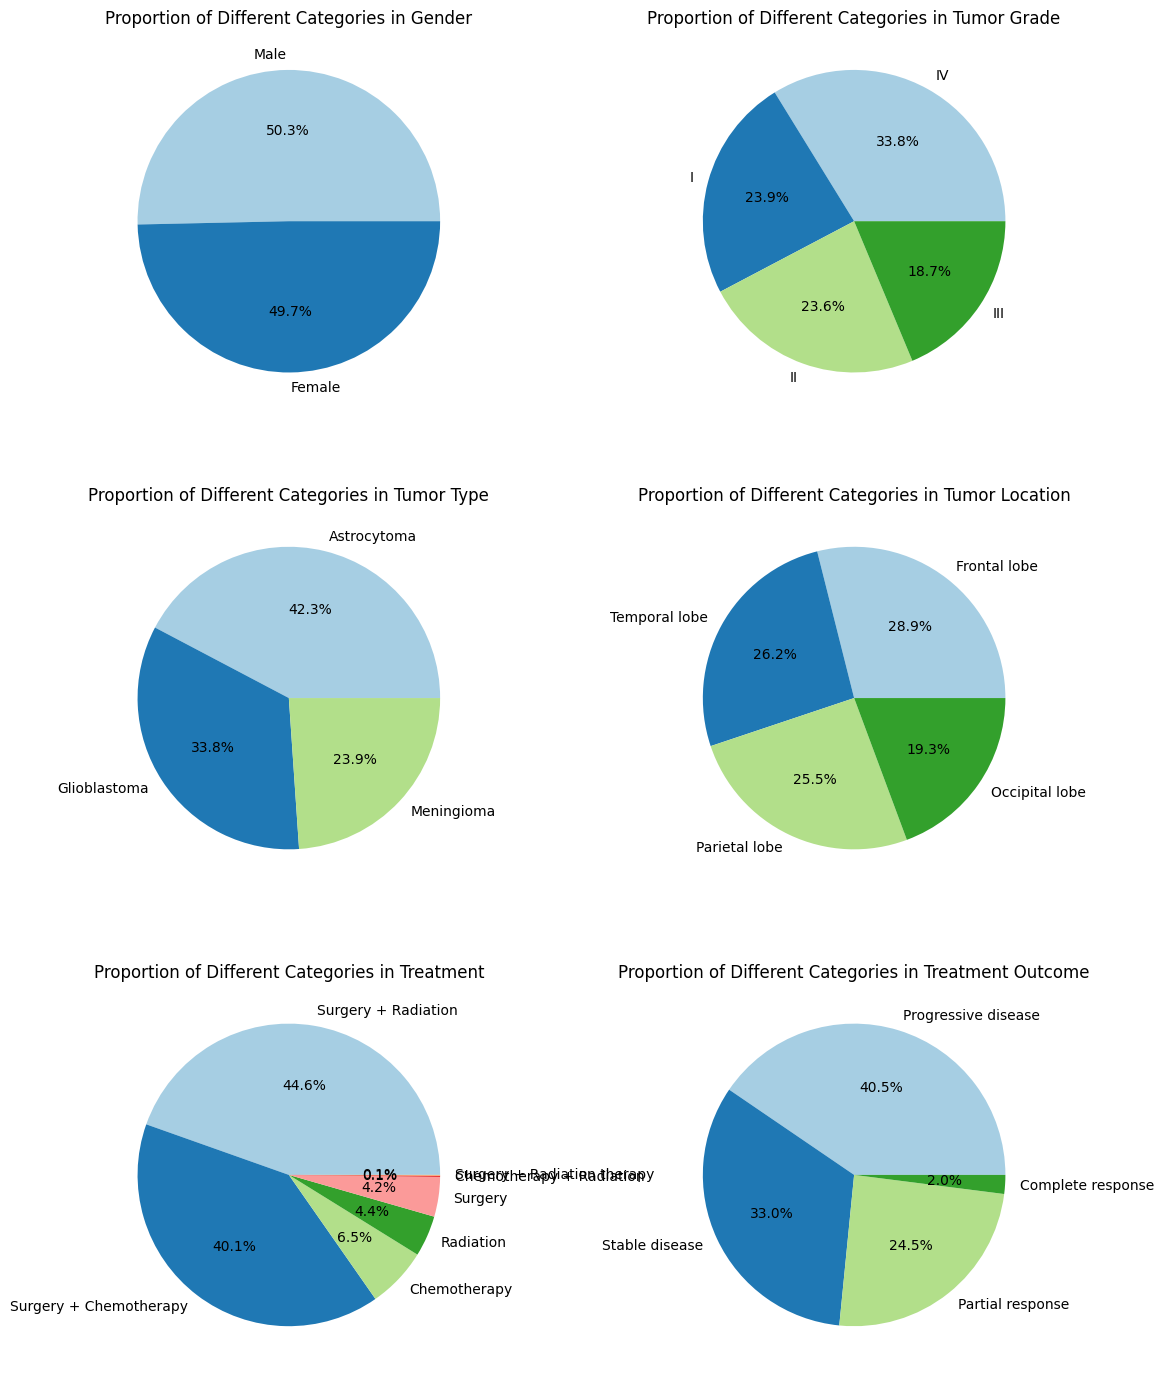

In [34]:
# Multivariate analysis using pieplot
features = ['Gender', 'Tumor Grade', 'Tumor Type', 'Tumor Location', 'Treatment', 'Treatment Outcome']

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots

for i, column in enumerate(features):
    counts = df[column].value_counts()
    ax = axes[i // 2, i % 2]  # Determine the current subplot axis
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(counts))))
    ax.set_title(f'Proportion of Different Categories in {column}')

# Remove the empty subplot if there are fewer features than subplots
if len(features) < 6:
    fig.delaxes(axes[2, 1])

plt.show()

#### 4.2 Histogram & Kernel Distribution Function (KDE)

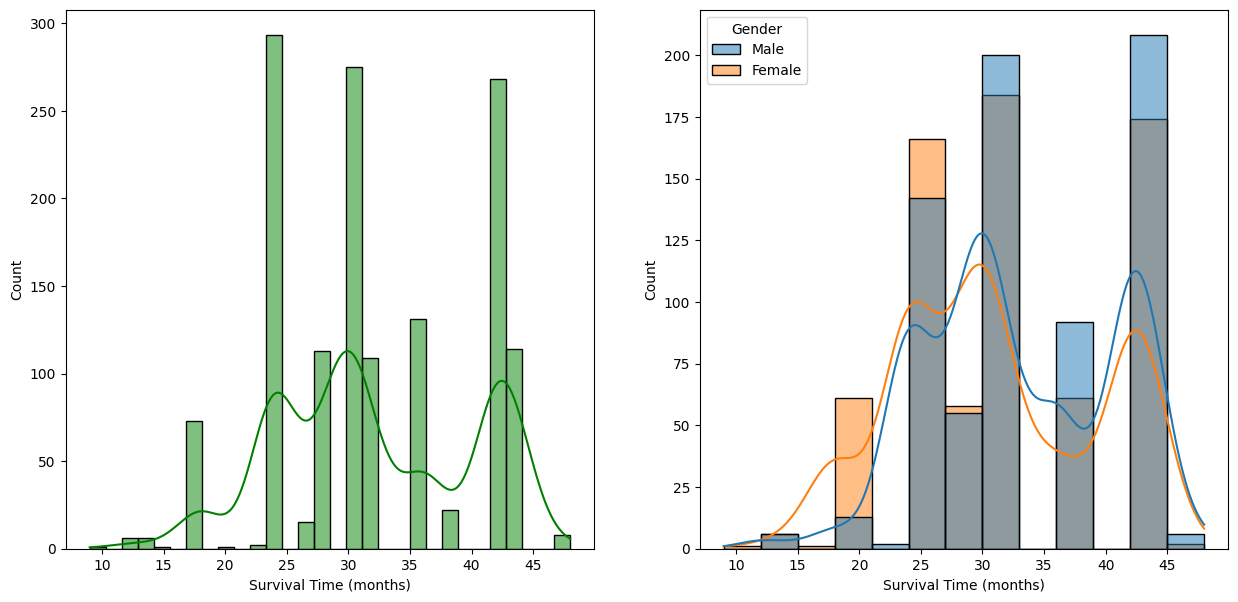

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Survival Time (months)',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Survival Time (months)',kde=True,hue='Gender')
plt.show()

Survival times are relatively similar between males and females.

#### 4.3 Feature Wise Bivariate Analysis

In [36]:
def plot_bivariate_analysis(df, feature, target='Survival Time (months)', palette='mako', figsize=(20, 8), title_color='#005ce6', title_size=20, label_color='black', label_size=15):
    Group_data = df.groupby(feature)
    
    f, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot the mean survival time for each feature category
    sns.barplot(x=Group_data[target].mean().index, 
                y=Group_data[target].mean().values, 
                palette=palette, ax=ax)
    ax.set_title(f'Survival Time (months) by {feature}', color=title_color, size=title_size)
    
    # Add labels to the bars
    for container in ax.containers:
        ax.bar_label(container, color=label_color, size=label_size)
    
    plt.show()

##### 4.3.1 Does gender have any impact on survival time?

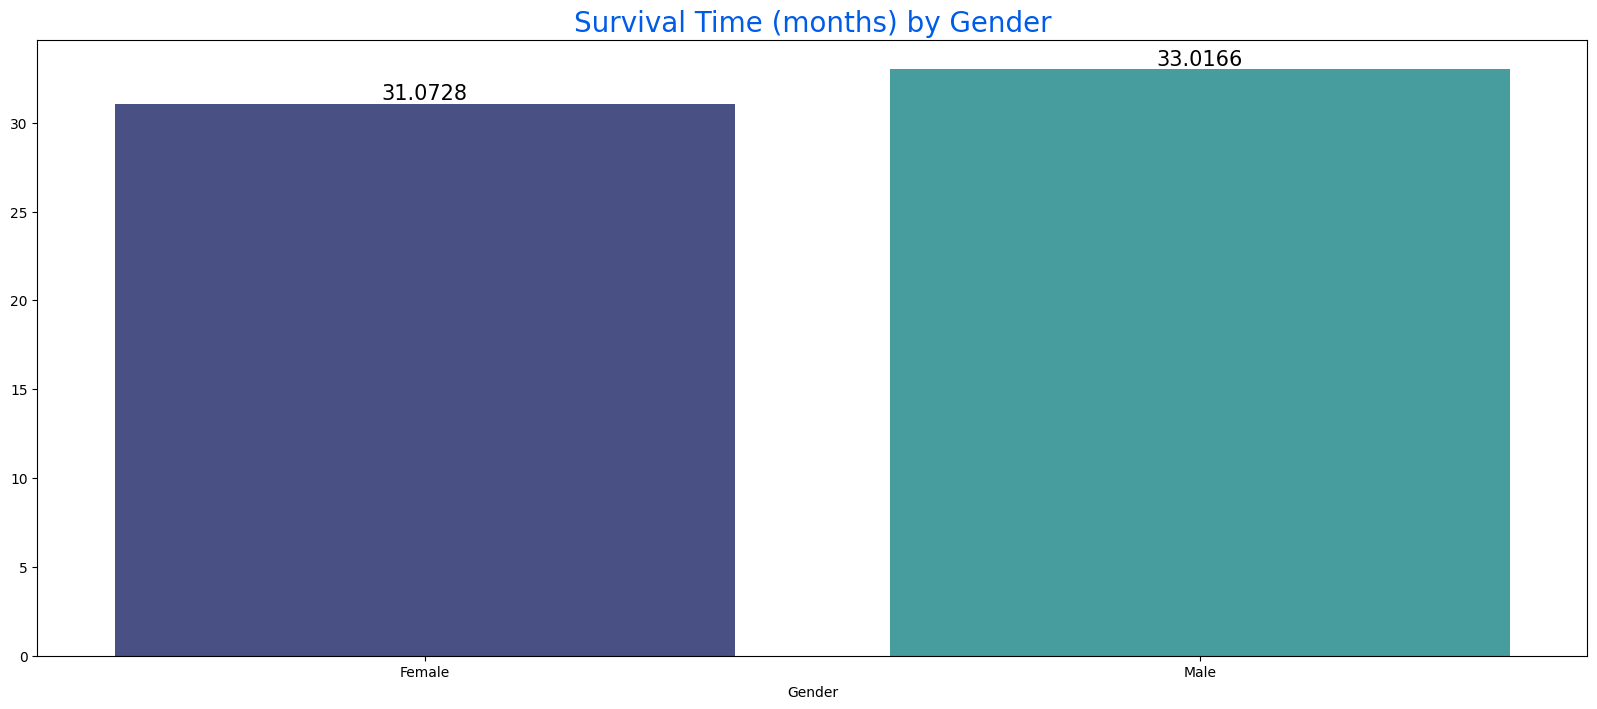

In [37]:
plot_bivariate_analysis(df, 'Gender')

##### 4.3.2 Does tumor grade have any impact on survival time?

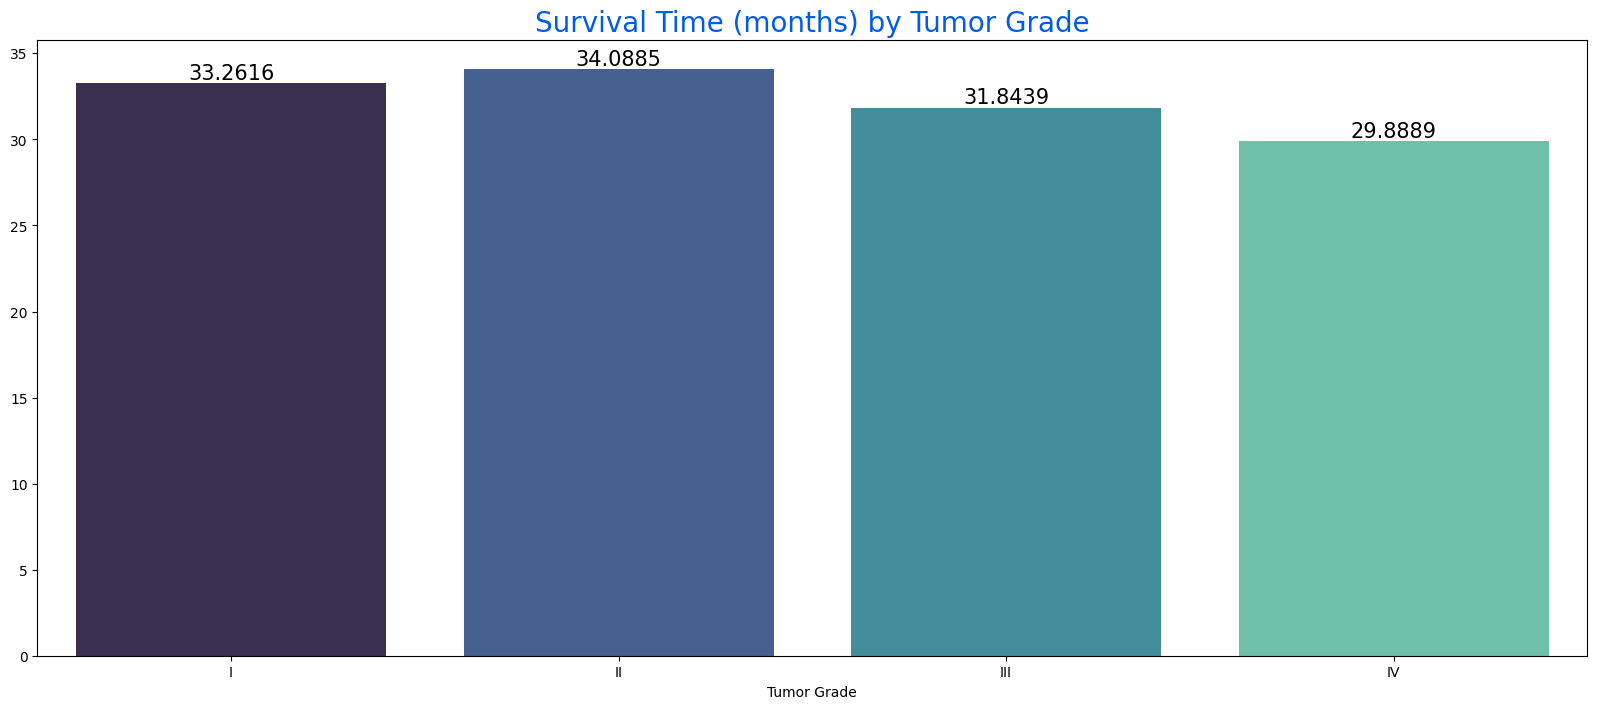

In [38]:
plot_bivariate_analysis(df, 'Tumor Grade')

##### 4.3.3 Does tumor type have any impact on survival time?

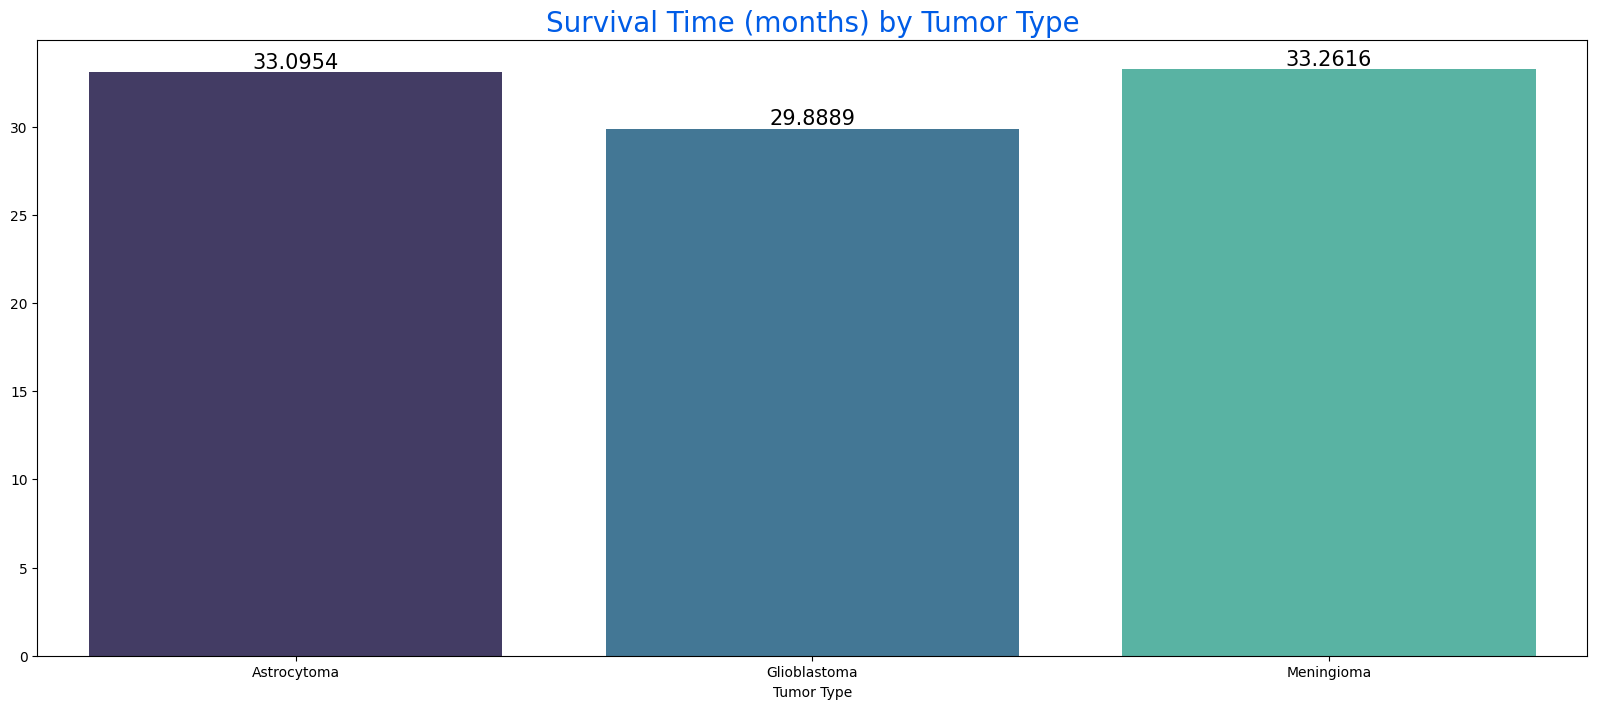

In [39]:
plot_bivariate_analysis(df, 'Tumor Type')

##### 4.3.4 Does tumor location have any impact on survival time?

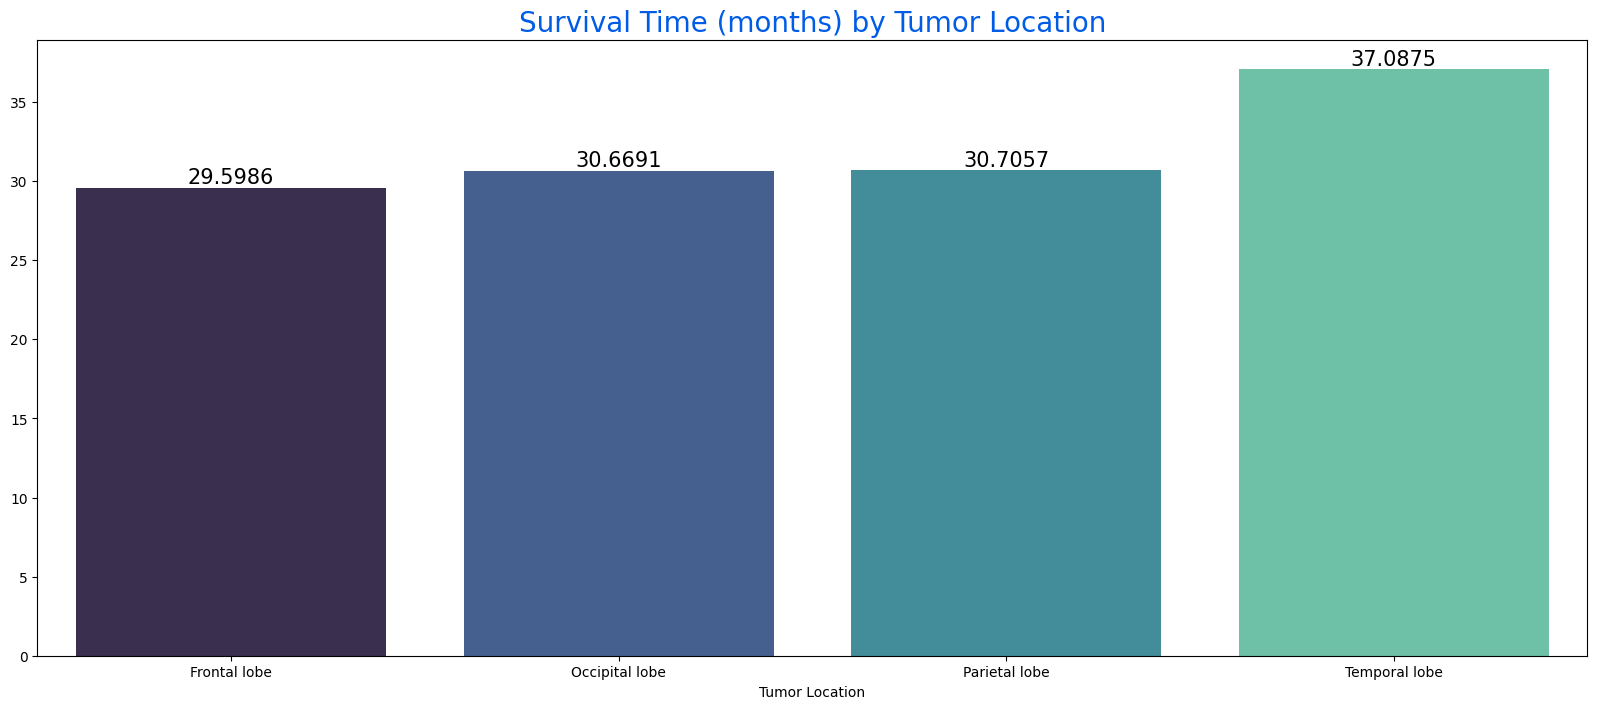

In [40]:
plot_bivariate_analysis(df, 'Tumor Location')

##### 4.3.5 How does the treatment impact survival time?

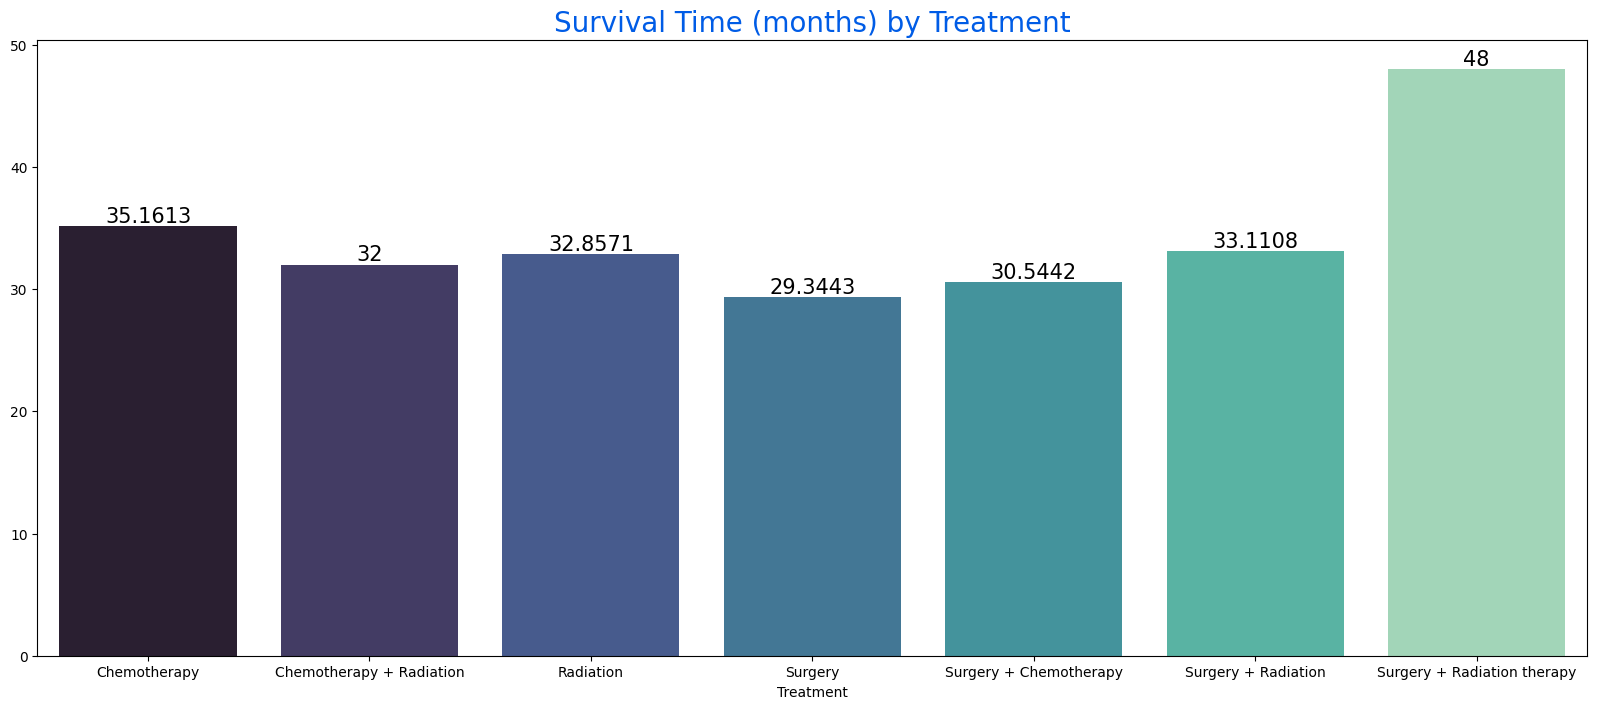

In [41]:
plot_bivariate_analysis(df, 'Treatment')

##### 4.3.6 How does the treatment outcome impact survival time?

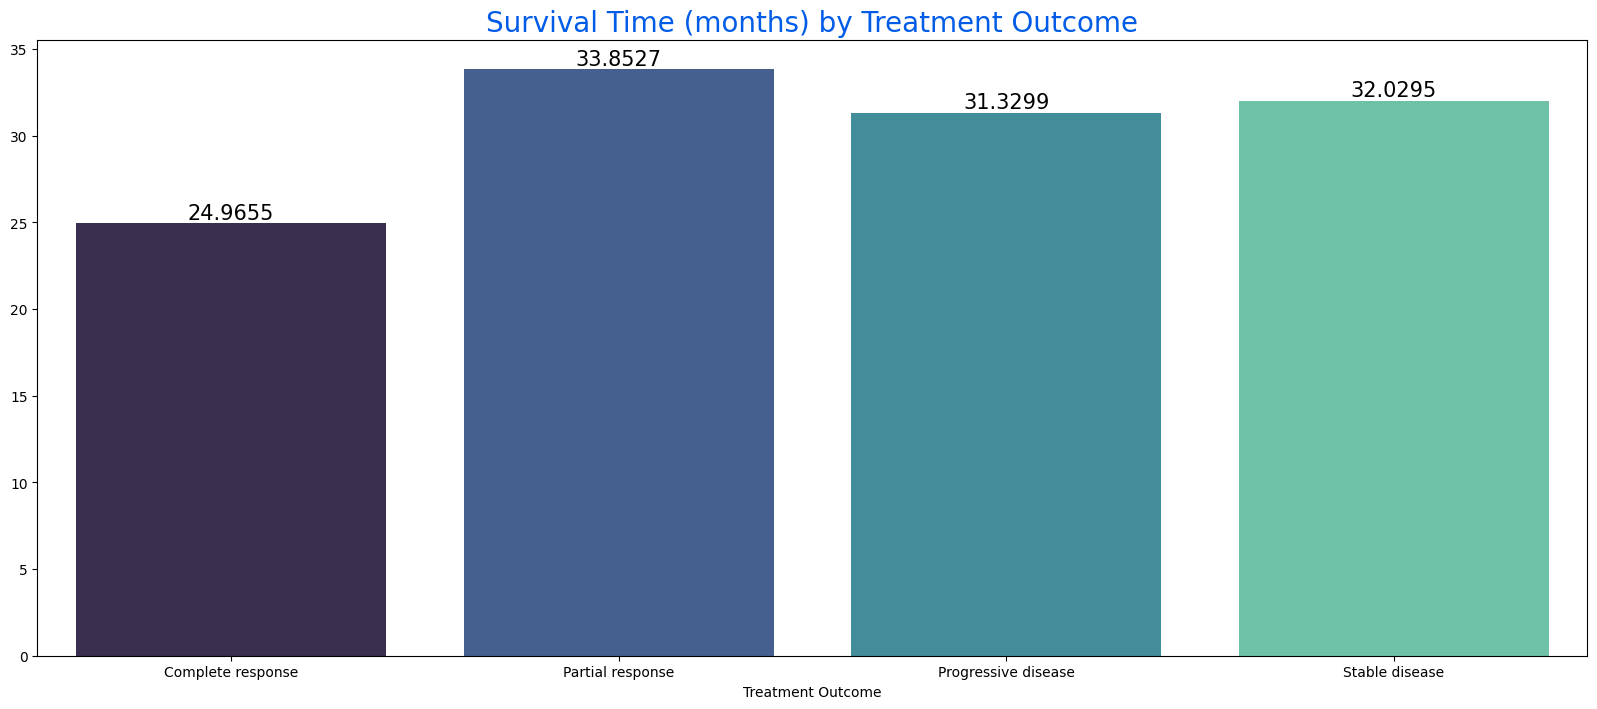

In [42]:
plot_bivariate_analysis(df, 'Treatment Outcome')

#### 4.4 Multivariate Analysis

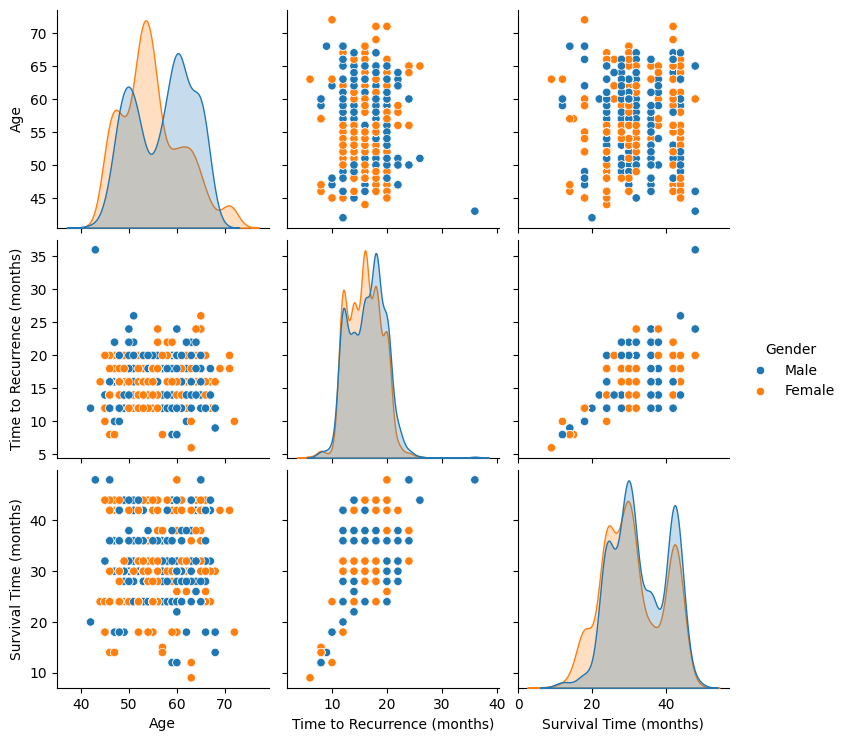

In [43]:
sns.pairplot(df,hue = 'Gender')
plt.show()

#### 4.5 Check for Outliers Using Boxplots

##### 4.5.1 Numerical

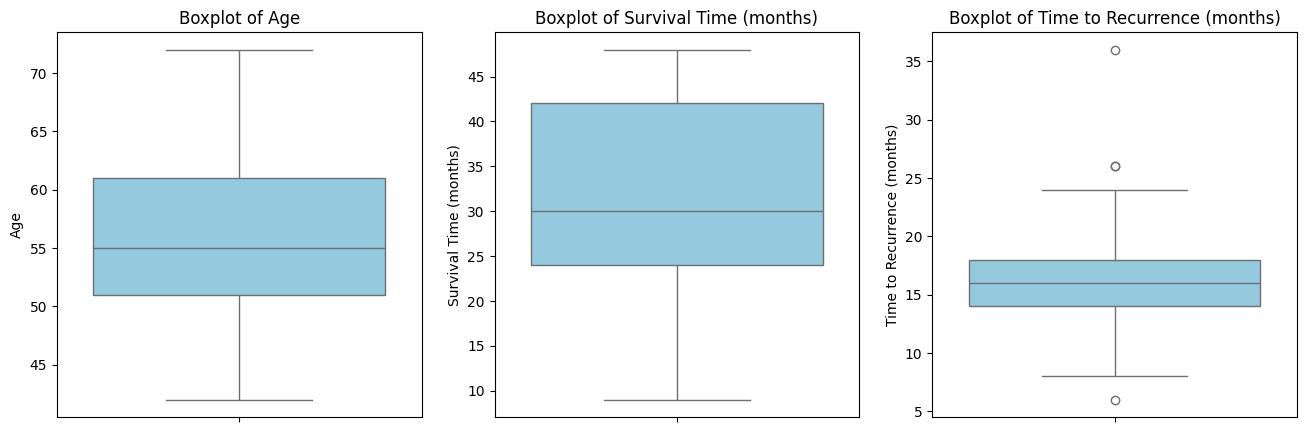

In [44]:
numerical_columns = ['Age', 'Survival Time (months)', 'Time to Recurrence (months)']

# Create subplots
plt.subplots(1, len(numerical_columns), figsize=(16, 5))

# Plot each numerical column
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')

plt.show()

##### 4.5.2 Categorical

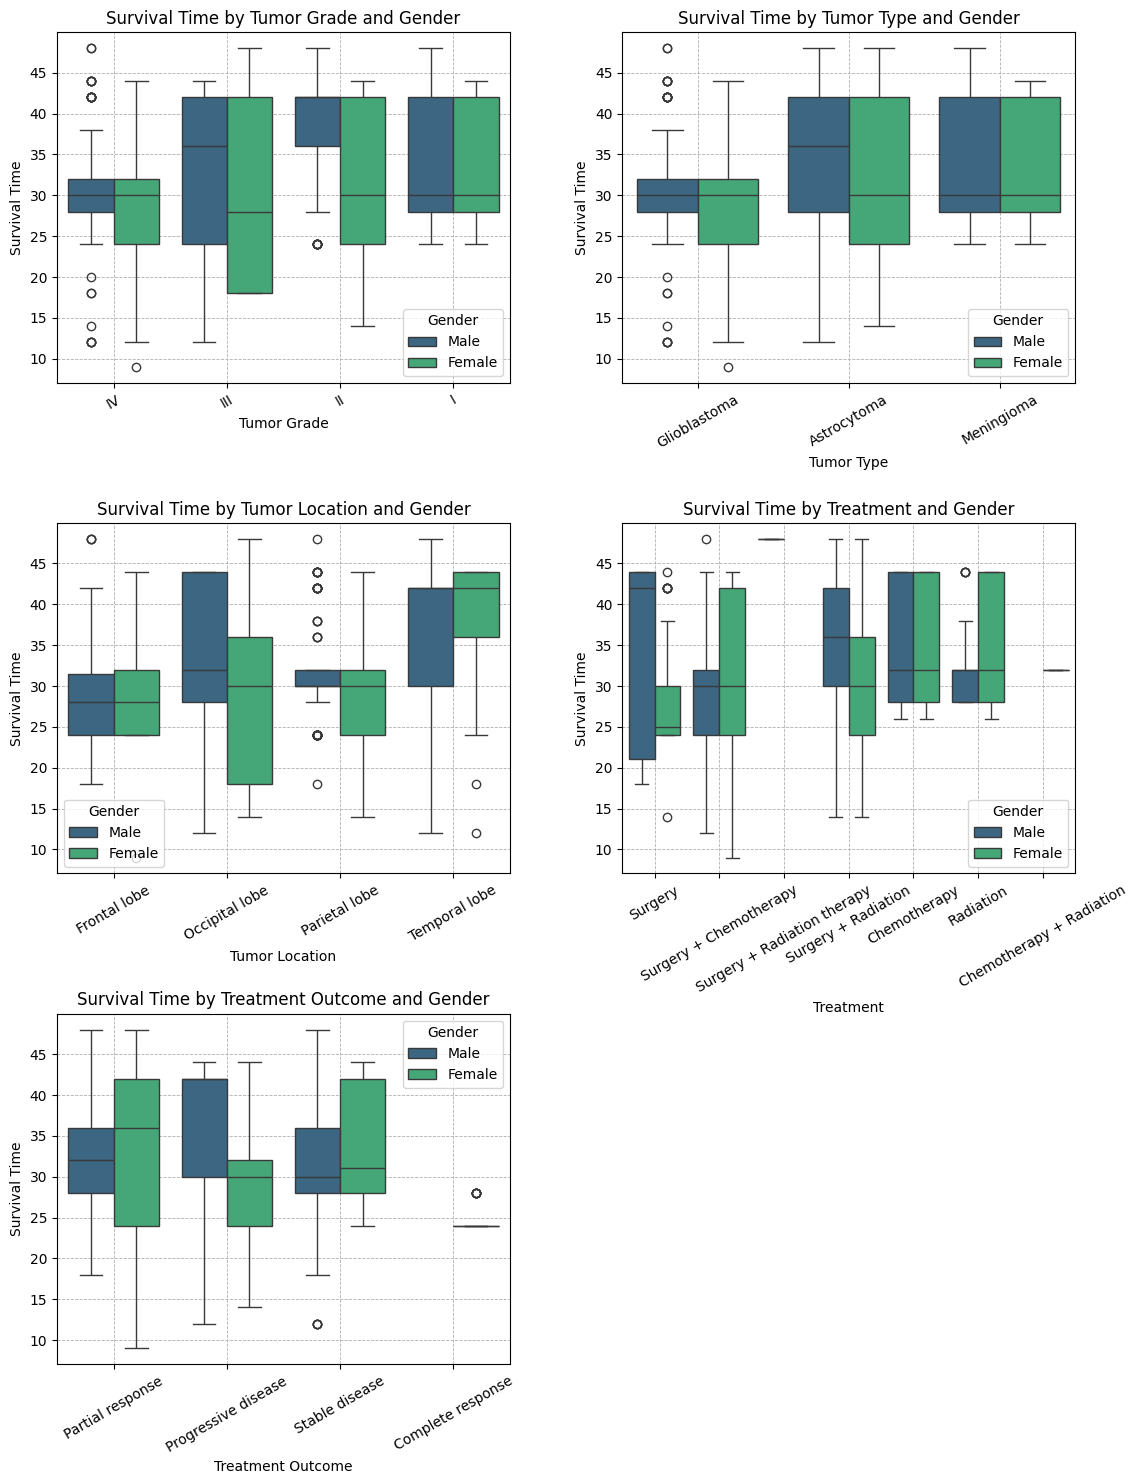

In [45]:
def plot_boxplot(column, df, ax):
    sns.boxplot(x=column, y='Survival Time (months)', data=df, hue='Gender', palette='viridis', ax=ax)
    ax.set_title(f'Survival Time by {column} and Gender')
    ax.set_xlabel(column)
    ax.set_ylabel('Survival Time')
    ax.tick_params(axis='x', rotation=30)
    ax.grid(True, which='major', linestyle='--', linewidth=0.6)  # Add grid lines

features = ['Tumor Grade', 'Tumor Type', 'Tumor Location', 'Treatment', 'Treatment Outcome']

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots

for i, column in enumerate(features):
    ax = axes[i // 2, i % 2]  # Determine the current subplot axis
    plot_boxplot(column, df, ax)

# Remove the empty subplot if there are fewer features than subplots
if len(features) < 6:
    fig.delaxes(axes[2, 1])

plt.subplots_adjust(hspace=0.4)
plt.show()